# Curso Internacional Ciencia de Datos para las Políticas Públicas en contexto de Crisis⋮


*Elaborado por Lina Marcela Diaz Bejarano, contacto: lina.diaz.bejarano@correounivalle.edu.co*

#TAREA 3

A. Cargar las dos bases de datos:

"t3_casos_acumulados_comuna_fecha.csv"
"t3_proximos_fallecidos_por_comuna_fecha.csv"
la cuales contienen, a nivel comunas por fecha datos de casos activos y muertes por rango de edad, asociadas a covid19. Se incluen además columnas de atributos comunales estudiados en la tarea anterior.

In [4]:
import os

path="/content/drive/MyDrive/Colab Notebooks" #Copiar aquí el directorio correspondiente
os.chdir(path)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [5]:
import pandas as pd

datosacum= pd.read_csv("t3_casos_acumulados_por_comuna_fecha.csv")

datosacum.head()

,Fecha,Codigo comuna,Fase,Casos,Codigo region,Poblacion,Semana,Año,Casos prev,Prop casos prev
0,2020-04-06,1101.0,5.0,13,1,223463.0,15,2020,9.0,1.444444
1,2020-04-07,1101.0,5.0,14,1,223463.0,15,2020,9.0,1.555556
2,2020-04-08,1101.0,5.0,16,1,223463.0,15,2020,9.0,1.777778
3,2020-04-09,1101.0,5.0,17,1,223463.0,15,2020,9.0,1.888889
4,2020-04-10,1101.0,5.0,18,1,223463.0,15,2020,9.0,2.000000


In [7]:
import pandas as pd

datosfallec= pd.read_csv("t3_proximos_fallecidos_por_comuna_fecha_edad.csv")

datosfallec.head()

,Fecha,Codigo comuna,<=39,40-49,50-59,60-69,70-79,80-89,>=90
0,2020-04-06,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-04-07,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-04-08,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-09,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-10,1101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


B. Visualiza estadísticas generales de la base de datos.

In [8]:
datosacum.describe()

,Codigo comuna,Fase,Casos,Codigo region,Poblacion,Semana,Año,Casos prev,Prop casos prev
count,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,1.922800e+05
mean,9035.999350,3.087352,2884.874100,8.799839,58267.014494,27.712393,2020.536863,2885.158342,inf
std,3836.288507,1.297512,6030.377119,3.864726,90224.612730,13.408389,0.498641,6031.200721,NaN
min,1101.000000,1.000000,0.000000,1.000000,137.000000,1.000000,2020.000000,0.000000,0.000000e+00
25%,6109.000000,2.000000,137.000000,6.000000,10292.000000,18.000000,2020.000000,137.000000,1.005814e+00
50%,8313.000000,3.000000,648.000000,8.000000,20743.000000,28.000000,2021.000000,648.000000,1.028169e+00
75%,13106.000000,4.000000,2454.000000,13.000000,58729.000000,38.000000,2021.000000,2454.000000,1.074510e+00
max,16305.000000,5.000000,76623.000000,16.000000,645909.000000,53.000000,2021.000000,76704.000000,inf


In [13]:
datosfallec.describe()

,Codigo comuna,<=39,40-49,50-59,60-69,70-79,80-89,>=90
count,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000,192280.000000
mean,9035.999350,0.007333,0.010641,0.027117,0.049610,0.067516,0.063272,0.025905
std,3836.288507,0.087486,0.106338,0.178357,0.258915,0.314245,0.293880,0.172838
min,1101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16305.000000,3.000000,3.000000,7.000000,8.000000,8.000000,7.000000,5.000000


In [14]:
corr = datosacum.corr()
corr.style.background_gradient(cmap='coolwarm')

,Codigo comuna,Fase,Casos,Codigo region,Poblacion,Semana,Año,Casos prev,Prop casos prev
Codigo comuna,1.000000,-0.022683,0.142449,0.999201,0.138021,-0.006369,0.002959,0.142496,-0.006574
Fase,-0.022683,1.000000,-0.173405,-0.023590,-0.071194,0.144731,-0.404373,-0.148578,0.158101
Casos,0.142449,-0.173405,1.000000,0.147604,0.760908,0.020895,0.268775,0.978365,-0.076555
Codigo region,0.999201,-0.023590,0.147604,1.000000,0.143900,-0.006338,0.002880,0.147650,-0.006627
Poblacion,0.138021,-0.071194,0.760908,0.143900,1.000000,-0.006092,-0.021248,0.745782,-0.002327
Semana,-0.006369,0.144731,0.020895,-0.006338,-0.006092,1.000000,-0.458447,0.013239,-0.051845
Año,0.002959,-0.404373,0.268775,0.002880,-0.021248,-0.458447,1.000000,0.252650,-0.160857
Casos prev,0.142496,-0.148578,0.978365,0.147650,0.745782,0.013239,0.252650,1.000000,-0.108788
Prop casos prev,-0.006574,0.158101,-0.076555,-0.006627,-0.002327,-0.051845,-0.160857,-0.108788,1.000000


In [15]:
corr = datosfallec.corr()
corr.style.background_gradient(cmap='coolwarm')

,Codigo comuna,<=39,40-49,50-59,60-69,70-79,80-89,>=90
Codigo comuna,1.000000,0.028624,0.030649,0.046342,0.063894,0.078159,0.080743,0.061291
<=39,0.028624,1.000000,0.054225,0.094580,0.104709,0.120277,0.096446,0.062073
40-49,0.030649,0.054225,1.000000,0.104344,0.126277,0.132270,0.111927,0.060272
50-59,0.046342,0.094580,0.104344,1.000000,0.197689,0.211285,0.172656,0.109312
60-69,0.063894,0.104709,0.126277,0.197689,1.000000,0.289240,0.240624,0.138403
70-79,0.078159,0.120277,0.132270,0.211285,0.289240,1.000000,0.271870,0.166585
80-89,0.080743,0.096446,0.111927,0.172656,0.240624,0.271870,1.000000,0.181624
>=90,0.061291,0.062073,0.060272,0.109312,0.138403,0.166585,0.181624,1.000000


C. En BBDD de fallecidos, crea una columna con las muertes totales considerando todos los rangos etarios. Suma las muerte totales por comuna y fecha.

In [10]:
datafall1=pd.melt(datosfallec,id_vars=['Codigo comuna','Fecha'],
var_name="Edad",
value_name="Muertes")
datafall1.head()


,Codigo comuna,Fecha,Edad,Muertes
0,1101.0,2020-04-06,<=39,0.0
1,1101.0,2020-04-07,<=39,0.0
2,1101.0,2020-04-08,<=39,0.0
3,1101.0,2020-04-09,<=39,0.0
4,1101.0,2020-04-10,<=39,0.0


In [11]:
datafall1["Fecha"]= pd.to_datetime(datafall1["Fecha"])

In [12]:
datafall1['Semana'] = datafall1['Fecha'].dt.week
datafall1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,Codigo comuna,Fecha,Edad,Muertes,Semana
0,1101.0,2020-04-06,<=39,0.0,15
1,1101.0,2020-04-07,<=39,0.0,15
2,1101.0,2020-04-08,<=39,0.0,15
3,1101.0,2020-04-09,<=39,0.0,15
4,1101.0,2020-04-10,<=39,0.0,15


In [13]:
fallesem=datafall1.groupby(['Codigo comuna','Fecha','Semana'])['Muertes'].sum().reset_index()
fallesem

,Codigo comuna,Fecha,Semana,Muertes
0,1101.0,2020-04-06,15,0.0
1,1101.0,2020-04-07,15,0.0
2,1101.0,2020-04-08,15,0.0
3,1101.0,2020-04-09,15,0.0
4,1101.0,2020-04-10,15,0.0
...,...,...,...,...
192275,16305.0,2021-10-27,43,0.0
192276,16305.0,2021-10-28,43,0.0
192277,16305.0,2021-10-29,43,0.0
192278,16305.0,2021-10-30,43,0.0


D. Une ambas bases de datos.

In [14]:
datosacum["Fecha"]= pd.to_datetime(datosacum["Fecha"])

In [15]:
datos_casos_fall = pd.merge(datosacum, fallesem, on=['Fecha','Semana','Codigo comuna'])
datos_casos_fall.head()

,Fecha,Codigo comuna,Fase,Casos,Codigo region,Poblacion,Semana,Año,Casos prev,Prop casos prev,Muertes
0,2020-04-06,1101.0,5.0,13,1,223463.0,15,2020,9.0,1.444444,0.0
1,2020-04-07,1101.0,5.0,14,1,223463.0,15,2020,9.0,1.555556,0.0
2,2020-04-08,1101.0,5.0,16,1,223463.0,15,2020,9.0,1.777778,0.0
3,2020-04-09,1101.0,5.0,17,1,223463.0,15,2020,9.0,1.888889,0.0
4,2020-04-10,1101.0,5.0,18,1,223463.0,15,2020,9.0,2.000000,0.0


In [16]:
len(datos_casos_fall)

192280

E. Crea al menos dos modelos supervisados en el que la variable dependiente sea el número de muertes totales.

Modelo 1-regresión lineal

In [1]:
pip install scikit-learn==0.24

     |████████████████████████████████| 22.3 MB 7.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [17]:
from sklearn.model_selection import train_test_split # Para separar a data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display, HTML

In [3]:
"datos_casos_fall['Fase']=datos_casos_fall['Fase'].astype('int64')
"datos_casos_fall['Poblacion']=datos_casos_fall['Poblacion'].astype('int64')
"datos_casos_fall['Casos prev']=datos_casos_fall['Casos prev'].astype('int64')

NameError: ignored

In [18]:
X=datos_casos_fall[['Fase','Casos','Poblacion','Semana','Año','Casos prev','Codigo comuna','Codigo region']]
Y=datos_casos_fall[['Muertes']]

In [19]:
datos_casos_fall.isnull().sum()

Fecha              0
Codigo comuna      0
Fase               0
Casos              0
Codigo region      0
Poblacion          0
Semana             0
Año                0
Casos prev         0
Prop casos prev    0
Muertes            0
dtype: int64

In [20]:
X.dtypes

Fase             float64
Casos              int64
Poblacion        float64
Semana             int64
Año                int64
Casos prev       float64
Codigo comuna    float64
Codigo region      int64
dtype: object

In [21]:
Y.dtypes

Muertes    float64
dtype: object

In [22]:
# Generamos la división entre la muestra de entrenamiento (train) y prueba (test) e iniciamos el generador aleatorio
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)

In [23]:
#Entrenamos el modelo con los datos correspondientes
import numpy as np

reg = LinearRegression().fit(X_train, Y_train)

#Vemos el ajuste del modelo
print("R^2: %.6f\t" % reg.score(X_train, Y_train))
print("\nCoeficiente de las variables independientes (entrenamiento):")

#Construimos un data dataframe para mostrar elegantemente los coeficiente por cada variable.

coeff_df = pd.DataFrame(np.transpose(reg.coef_), X_train.columns, columns=['Coefficient'])  
display(HTML(coeff_df.to_html()))
print("Intercepto (entrenamiento)\t: %.6f" % reg.intercept_)


# Calculamos el error usando el dataset de prueba
Y_pred = reg.predict(X_test)
print('\nMean squared error (prueba)\t: %.6f' % mean_squared_error(Y_test, Y_pred))
print('Coeff. of determination(prueba)\t: %.6f' % r2_score(Y_test, Y_pred))


R^2: 0.272803	

Coeficiente de las variables independientes (entrenamiento):


,Coefficient
Fase,-0.031344
Casos,0.000043
Poblacion,0.000005
Semana,-0.005622
Año,-0.081580
Casos prev,-0.000047
Codigo comuna,0.000020
Codigo region,-0.011375


Intercepto (entrenamiento)	: 165.003435

Mean squared error (prueba)	: 0.453950
Coeff. of determination(prueba)	: 0.272132


Modelo 2-HistGradientBoostingRegressor 

In [24]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [25]:
datos_casos_fall['test'] = (datos_casos_fall.Fecha > datos_casos_fall.Fecha.max() - pd.Timedelta(14, unit='D')).astype(int)

In [26]:
datos_casos_fall.dtypes

Fecha              datetime64[ns]
Codigo comuna             float64
Fase                      float64
Casos                       int64
Codigo region               int64
Poblacion                 float64
Semana                      int64
Año                         int64
Casos prev                float64
Prop casos prev           float64
Muertes                   float64
test                        int64
dtype: object

In [27]:
datos_casos_fall['Fase']=datos_casos_fall['Fase'].astype('object')

In [28]:
datos_casos_fall.test.value_counts()

0    187478
1      4802
Name: test, dtype: int64

In [29]:
X_train = datos_casos_fall.loc[datos_casos_fall['test'] < 1, ['Codigo comuna', 'Fase', 'Casos', 'Codigo region', 'Poblacion', 'Semana', 'Año', 'Casos prev', 'Prop casos prev']].copy()
X_test = datos_casos_fall.loc[datos_casos_fall['test'] > 0, ['Codigo comuna', 'Fase', 'Casos', 'Codigo region', 'Poblacion', 'Semana', 'Año', 'Casos prev', 'Prop casos prev']].copy()

In [30]:
y_train = datos_casos_fall.loc[datos_casos_fall['test'] < 1, 'Muertes'].copy()
y_test = datos_casos_fall.loc[datos_casos_fall['test'] > 0, 'Muertes'].copy()

In [31]:
model = HistGradientBoostingRegressor(categorical_features=[False, True, False, False, False, False, False, False, False])

In [32]:
model.fit(X_train, y_train)

HistGradientBoostingRegressor(categorical_features=[False, True, False, False,
                                                    False, False, False, False,
                                                    False])

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)

0.062363262026506626

In [35]:
np.corrcoef(y_pred, y_test)[0, 1]

0.19162861352279703

F. Evalua los resultados a través del MAE y r cuadrado. Comenta como son estos resultados. Escoge el modelo de mejor desempeño.

ECM y R2 para el modelo de regresion  MAE fue de 0.45 y el R2 de 0.27. Por otro lado en el modelo gradientes boost regresión el MAE es de 0,06 y el R2 fue de 0,19. Los dos modelos tienen resultados similares en cuanto al R2, sin embargo el modelo boost gradient regression disminuye el error cuadratico medio sugiriendo un posible mejor desempeño.

G. Construye un modelo explicativo utilizando shap y visualiza los resultados con un gráfico de enjambre.

In [36]:
%%capture
!pip install shap

In [37]:
import shap

In [38]:
explainer = shap.Explainer(model)

In [39]:
shap_values = explainer(X_test)

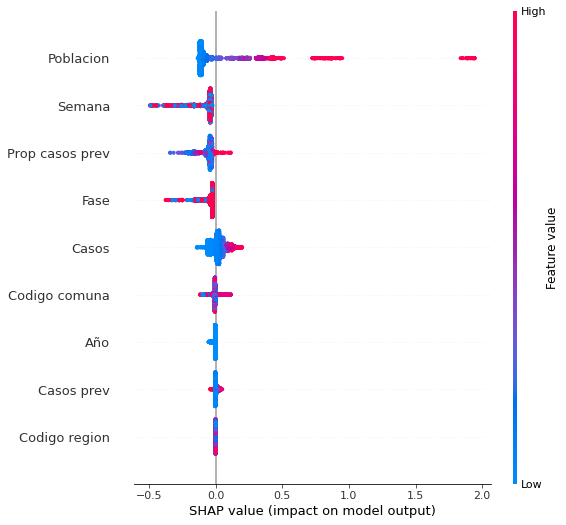

In [40]:
shap.plots.beeswarm(shap_values, plot_size=.8)

De acuerdo con el diagrama de enjambre muestra la relación entre los valores originales y el aporte de cada variable en la predicción a través de los valores SHAP. Para la población y los Casos los valores que tomán la variable toman valores hacia el rango alto y la predicción también aporta hacia valores positivos, en los valores bajor la contribución de los SHAP es negativa. En la semana y la fase el dominio la relación entre los valores originales y el valor de los  SHAP, los valores observados fueron altos y la predicciones  SHAP tienen una contribución negativa.  En el año, casos prev y codigo región parece mostrar una contribución muy pequeña hacia valores positivos o negativos de la variable, siendo muy cercano a cero.

H. Elabora un gráfico barras para evaluar la importancia global de cada predictor. Entregue una interpretación a los valores SHAP asociados a cada atributo.

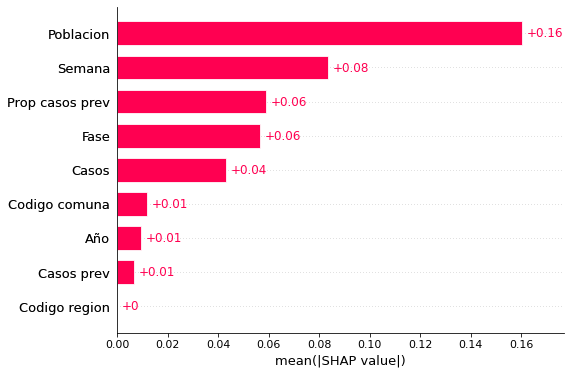

In [41]:
shap.plots.bar(shap_values)

Las variables que más estan aportando al modelo según el valor de los SHAP como una contribución a la predicción de las muertes por COVID19 es la población por comuna, la semanas, la relación entre casos actuales casos de la semana anterior (Prop casos prev) y la fase en la que se encuentra la comuna.

In [42]:
shap_values.base_values = shap_values.base_values[0, 0]

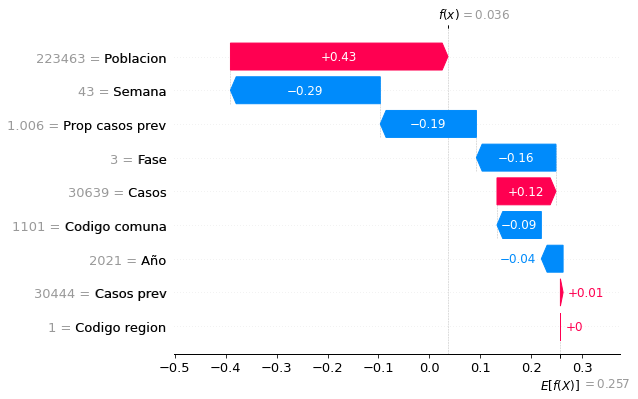

In [43]:
shap.plots.waterfall(shap_values[9])

BONUS: realiza un plot del mapa de tu país de origen.

In [44]:
%%capture
!pip install geopandas

In [48]:
import geopandas as gpd
import pandas as pd
import shapely

In [50]:

data=gpd.read_file('/content/drive/MyDrive/Colab Notebooks/mpio/mpio.shp')

In [52]:
data.head()

,AREA,PERIMETER,WCOLGEN02_,WCOLGEN021,DPTO,NOMBRE_DPT,MPIO,NOMBRE_MPI,NOMBRE_CAB,CLASEMUN,MPIOS,ZONA,OF_REG,REG_ZONAS,HECTARES,geometry
0,7.516766e+09,475636.130236,2,566,44,LA GUAJIRA,847,URIBIA,URIBIA,CM,44847,ZONA06,DABAR,DABARZONA06,751676.579,"POLYGON ((1290154.980 1796649.425, 1270385.550..."
1,1.624663e+09,195961.387498,5,564,44,LA GUAJIRA,560,MANAURE,MANAURE,CM,44560,ZONA06,DABAR,DABARZONA06,162466.283,"POLYGON ((1187687.339 1800431.820, 1188158.788..."
2,1.779934e+09,272174.538806,6,563,44,LA GUAJIRA,430,MAICAO,MAICAO,CM,44430,ZONA06,DABAR,DABARZONA06,177993.385,"POLYGON ((1198031.055 1767210.476, 1212713.613..."
3,3.109950e+09,267346.564817,7,559,44,LA GUAJIRA,001,RIOHACHA,RIOHACHA,CM,44001,ZONA06,DABAR,DABARZONA06,310995.043,"POLYGON ((1156062.702 1755981.216, 1159630.667..."
4,1.999866e+09,198794.872346,8,1052,44,LA GUAJIRA,090,DIBULLA,DIBULLA,CM,44090,ZONA06,DABAR,DABARZONA06,199986.641,"POLYGON ((1095571.713 1750924.096, 1097255.333..."


##MAPA DE COLOMBIA POR MUNICIPIOS

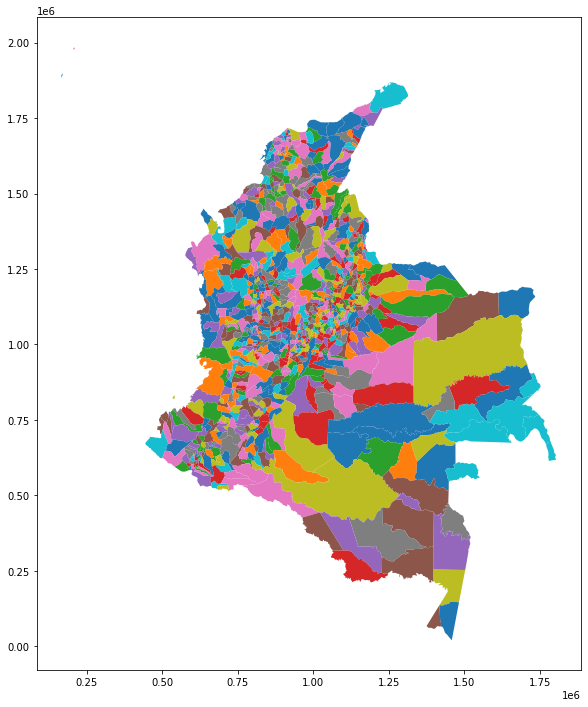

In [55]:
data.plot(figsize=(12, 12),column='MPIO')